In [1]:
import numpy as np
import pandas as pd

pd.options.display.max_columns = 200

battingDF = pd.read_csv("Batting.csv")
battingDF.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [2]:
# top 25 homerun total in a season?
# who has hit the most homeruns?
battingDF[["playerID","HR","yearID"]].sort_values("HR",ascending=False).head(25)

,playerID,HR,yearID
80752,bondsba01,73,2001
77389,mcgwima01,70,1998
77736,sosasa01,66,1998
78705,mcgwima01,65,1999
81770,sosasa01,64,2001
79053,sosasa01,63,1999
41661,marisro01,61,1961
22256,ruthba01,60,1927
19039,ruthba01,59,1921
24639,foxxji01,58,1932


In [3]:
# barry bonds is at the top of the list. let's see how he's done over the years
# how do we only get barry bonds's data?
battingDF[["playerID","HR","yearID","G","AB"]].sort_values("HR",
    ascending=False).loc[battingDF["playerID"]=="bondsba01"]

,playerID,HR,yearID,G,AB
80752,bondsba01,73,2001,153,476
79377,bondsba01,49,2000,143,480
70779,bondsba01,46,1993,159,539
82081,bondsba01,46,2002,143,403
83409,bondsba01,45,2003,130,390
84761,bondsba01,45,2004,147,373
74255,bondsba01,42,1996,158,517
75505,bondsba01,40,1997,159,532
71937,bondsba01,37,1994,112,391
76749,bondsba01,37,1998,156,552


In [4]:
bbHRStats = battingDF[["playerID","HR","yearID","G","AB"]].sort_values("HR",
    ascending=False).loc[battingDF["playerID"]=="bondsba01"]

In [5]:
import seaborn as sb
%matplotlib inline

/Users/jason/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/jason/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


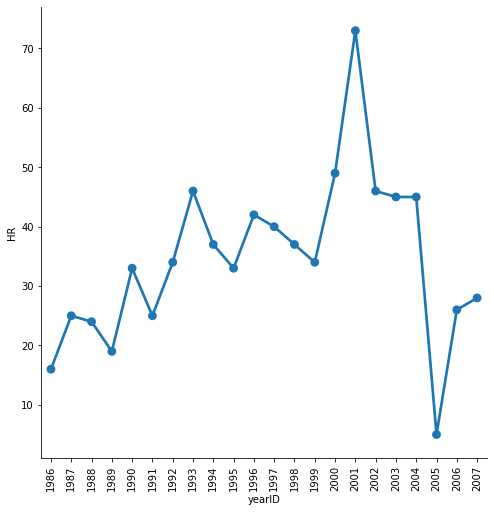

In [6]:
sb.factorplot(x="yearID",y="HR",data=bbHRStats,size=7).set_xticklabels(rotation=90)

In [7]:
len(battingDF["playerID"].unique()) # unique gives us the unique playerIDs in battingDF

18915

In [8]:
# introducing: Grouping
# .groupby makes a Group object:
playerIDGrouping = battingDF.groupby("playerID")

In [9]:
type(playerIDGrouping)

pandas.core.groupby.generic.DataFrameGroupBy

In [10]:
len(playerIDGrouping)

18915

In [11]:
playerIDGrouping.groups
# this looks like a dictionary

{'aardsda01': Int64Index([84639, 87315, 88692, 90077, 91462, 92850, 95595, 97003, 99847], dtype='int64'),
 'aaronha01': Int64Index([36873, 37449, 38104, 38725, 39340, 39978, 40610, 41247, 41945,
             42705, 43457, 44211, 44962, 45736, 46522, 47237, 48169, 49088,
             49971, 50859, 51751, 52665, 53572],
            dtype='int64'),
 'aaronto01': Int64Index([41946, 42706, 44212, 46523, 47238, 48170, 49089], dtype='int64'),
 'aasedo01': Int64Index([54458, 55442, 56402, 57363, 58313, 59257, 61255, 62239, 63237,
             64254, 65302, 66337, 67410],
            dtype='int64'),
 'abadan01': Int64Index([80634, 83292, 87316], dtype='int64'),
 'abadfe01': Int64Index([92851, 94206, 95596, 97004, 98412, 99848, 101333, 101334], dtype='int64'),
 'abadijo01': Int64Index([519, 520], dtype='int64'),
 'abbated01': Int64Index([6951, 7231, 8964, 9364, 9770, 10614, 11060, 11530, 12073, 12074], dtype='int64'),
 'abbeybe01': Int64Index([5461, 5771, 6057, 6351, 6352, 6656], dtype='int64'),

In [12]:
type(playerIDGrouping.groups)

dict

In [13]:
# groups property is a dictionary where the keys are the playerIDs (the things we grouped on)
# and the values are row indexes

In [14]:
playerIDGrouping.groups["bondsba01"] # bonds's data

Int64Index([63321, 64337, 65393, 66440, 67508, 68624, 69708, 70779, 71937,
            73002, 74255, 75505, 76749, 78074, 79377, 80752, 82081, 83409,
            84761, 86093, 87432, 88805],
           dtype='int64')

In [15]:
battingDF.loc[[63321,64337,65393]]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
63321,bondsba01,1986,1,PIT,NL,113,413,72,92,26,3,16,48.0,36.0,7.0,65,102.0,2.0,2.0,2.0,2.0,4.0
64337,bondsba01,1987,1,PIT,NL,150,551,99,144,34,9,25,59.0,32.0,10.0,54,88.0,3.0,3.0,0.0,3.0,4.0
65393,bondsba01,1988,1,PIT,NL,144,538,97,152,30,5,24,58.0,17.0,11.0,72,82.0,14.0,2.0,0.0,2.0,3.0


In [16]:
playerIDGrouping.get_group("bondsba01")

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
63321,bondsba01,1986,1,PIT,NL,113,413,72,92,26,3,16,48.0,36.0,7.0,65,102.0,2.0,2.0,2.0,2.0,4.0
64337,bondsba01,1987,1,PIT,NL,150,551,99,144,34,9,25,59.0,32.0,10.0,54,88.0,3.0,3.0,0.0,3.0,4.0
65393,bondsba01,1988,1,PIT,NL,144,538,97,152,30,5,24,58.0,17.0,11.0,72,82.0,14.0,2.0,0.0,2.0,3.0
66440,bondsba01,1989,1,PIT,NL,159,580,96,144,34,6,19,58.0,32.0,10.0,93,93.0,22.0,1.0,1.0,4.0,9.0
67508,bondsba01,1990,1,PIT,NL,151,519,104,156,32,3,33,114.0,52.0,13.0,93,83.0,15.0,3.0,0.0,6.0,8.0
68624,bondsba01,1991,1,PIT,NL,153,510,95,149,28,5,25,116.0,43.0,13.0,107,73.0,25.0,4.0,0.0,13.0,8.0
69708,bondsba01,1992,1,PIT,NL,140,473,109,147,36,5,34,103.0,39.0,8.0,127,69.0,32.0,5.0,0.0,7.0,9.0
70779,bondsba01,1993,1,SFN,NL,159,539,129,181,38,4,46,123.0,29.0,12.0,126,79.0,43.0,2.0,0.0,7.0,11.0
71937,bondsba01,1994,1,SFN,NL,112,391,89,122,18,1,37,81.0,29.0,9.0,74,43.0,18.0,6.0,0.0,3.0,3.0
73002,bondsba01,1995,1,SFN,NL,144,506,109,149,30,7,33,104.0,31.0,10.0,120,83.0,22.0,5.0,0.0,4.0,12.0


In [17]:
type(playerIDGrouping.get_group("bondsba01"))
# get_group works like a filter
# gives you a dataframe where the rows are for playerID = bondsba01

pandas.core.frame.DataFrame

In [18]:
playerIDGrouping.get_group("bondsba01")[["HR","AB","yearID"]]

,HR,AB,yearID
63321,16,413,1986
64337,25,551,1987
65393,24,538,1988
66440,19,580,1989
67508,33,519,1990
68624,25,510,1991
69708,34,473,1992
70779,46,539,1993
71937,37,391,1994
73002,33,506,1995


In [19]:
playerIDGrouping.get_group("mcgwima01")[["HR","AB","yearID"]]

,HR,AB,yearID
63825,3,53,1986
64858,49,557,1987
65894,32,550,1988
66955,33,490,1989
68062,39,523,1990
69175,22,483,1991
70236,42,467,1992
71370,9,84,1993
72453,9,135,1994
73611,39,317,1995


In [20]:
# total homeruns for barry bonds?
sum(playerIDGrouping.get_group("bondsba01")["HR"])

762

In [21]:
# highest # of homeruns in a season?
max(playerIDGrouping.get_group("bondsba01")["HR"])

73

In [22]:
# we got summary info for individual players. what if we wanted to do this sort of thing
# for all players?
battingDF.groupby("playerID").agg({"HR":sum})
# method: agg
# takes a dictionary as a parameter
# the key in this dictionary is the column we want to aggregate on
# the value is the function that we'll use to aggregate
# here we're just summing the homeruns for all players over their careers

,HR
playerID,
aardsda01,0
aaronha01,755
aaronto01,13
aasedo01,0
abadan01,0
...,...
zupofr01,0
zuvelpa01,2
zuverge01,0


In [23]:
type(battingDF.groupby("playerID").agg({"HR":sum})) # the agg method which MUST be run on 
# a groupby object returns a DataFrame

pandas.core.frame.DataFrame

In [24]:
battingDF.groupby("playerID").agg({"HR":sum}).loc["bondsba01"]

HR    762
Name: bondsba01, dtype: int64

In [25]:
# what are the top total homeruns across careers? get the top 15
battingDF.groupby("playerID").agg({"HR":sum}).sort_values("HR",ascending=False).head(15)

,HR
playerID,
bondsba01,762
aaronha01,755
ruthba01,714
rodrial01,696
mayswi01,660
griffke02,630
thomeji01,612
sosasa01,609
pujolal01,591


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24ab8470>]],
      dtype=object)

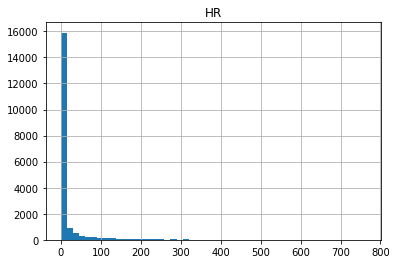

In [26]:
battingDF.groupby("playerID").agg({"HR":sum}).hist(bins=50)

In [27]:
# what's the average number of homeruns per game per year?
battingDF.groupby("yearID").agg({"HR":np.mean}).sort_values("HR",ascending=False)

,HR
yearID,
1999,4.255581
1987,4.253817
2000,4.113439
2001,4.076176
2004,4.049777
...,...
1876,0.322581
1878,0.287500
1877,0.247423


In [28]:
avgHR = battingDF.groupby("yearID").agg({"HR":np.mean})
avgHR

,HR
yearID,
1871,0.408696
1872,0.224359
1873,0.368000
1874,0.325203
1875,0.183486
...,...
2012,3.504261
2013,3.308020
2014,2.917073


In [29]:
type(avgHR)

pandas.core.frame.DataFrame

In [30]:
avgHR.columns

Index(['HR'], dtype='object')

In [31]:
avgHR.loc[2000:2016]
# when using groupby, the column that you are grouping by becomes the dataframe's
# row indices

,HR
yearID,
2000,4.113439
2001,4.076176
2002,3.835481
2003,3.865627
2004,4.049777
2005,3.772180
2006,3.911402
2007,3.579061
2008,3.522022


In [32]:
# how do we get row indices into a column?
# use reset_index
avgHR = avgHR.reset_index()
avgHR

,yearID,HR
0,1871,0.408696
1,1872,0.224359
2,1873,0.368000
3,1874,0.325203
4,1875,0.183486
...,...,...
141,2012,3.504261
142,2013,3.308020
143,2014,2.917073
144,2015,3.303499


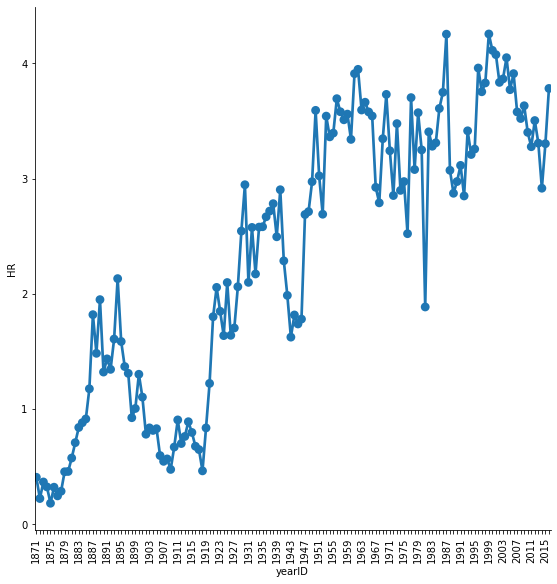

In [33]:
avgHRPlot = sb.catplot(x="yearID",y="HR",
                       data=avgHR,height=8,kind="point").set_xticklabels(rotation=90)
#for label in avgHRPlot.ax.xaxis.get_ticklabels()[::2]: # makes every other label hidden
#    label.set_visible(False)
counter = 0
for label in avgHRPlot.ax.xaxis.get_ticklabels():
    if (counter % 4 != 0):
        label.set_visible(False)
    counter+=1

In [34]:
# reminder! you MUST run the .agg method on a groupby object, not on a dataframe!

In [35]:
# let's add some more information to our groupings
battingDF.groupby("playerID").agg({"HR":sum
                    ,"yearID":[min,max]}).sort_values([("HR","sum")],ascending=False)

HR yearID      
           sum    min   max
playerID                   
bondsba01  762   1986  2007
aaronha01  755   1954  1976
ruthba01   714   1914  1935
rodrial01  696   1994  2016
mayswi01   660   1951  1973
...        ...    ...   ...
hovlijo01    0   1909  1911
howarbe01    0   2002  2004
howarch01    0   1991  1994
howarch02    0   1993  1995
zychto01     0   2015  2016

[18915 rows x 3 columns]

In [36]:
# what if we wanted to also display how many years a player played? we can take the difference
# in the max and min of yearID to get years played
battingDF.groupby("playerID").agg({"HR":sum
    ,"yearID":[min,max,lambda x:max(x)-min(x)]}).sort_values([("HR","sum")],ascending=False)

HR yearID                 
           sum    min   max <lambda_0>
playerID                              
bondsba01  762   1986  2007         21
aaronha01  755   1954  1976         22
ruthba01   714   1914  1935         21
rodrial01  696   1994  2016         22
mayswi01   660   1951  1973         22
...        ...    ...   ...        ...
hovlijo01    0   1909  1911          2
howarbe01    0   2002  2004          2
howarch01    0   1991  1994          3
howarch02    0   1993  1995          2
zychto01     0   2015  2016          1

[18915 rows x 4 columns]

In [37]:
# the above code is the same as doing this:
yearsPlayed = lambda x:max(x)-min(x)
battingDF.groupby("playerID").agg({"HR":sum
    ,"yearID":[min,max,yearsPlayed]}).sort_values([("HR","sum")],ascending=False)

HR yearID                 
           sum    min   max <lambda_0>
playerID                              
bondsba01  762   1986  2007         21
aaronha01  755   1954  1976         22
ruthba01   714   1914  1935         21
rodrial01  696   1994  2016         22
mayswi01   660   1951  1973         22
...        ...    ...   ...        ...
hovlijo01    0   1909  1911          2
howarbe01    0   2002  2004          2
howarch01    0   1991  1994          3
howarch02    0   1993  1995          2
zychto01     0   2015  2016          1

[18915 rows x 4 columns]

In [38]:
# something that would be cool: plot the HRs of the top 10 HR hitters on this list per season
topHRHitters = battingDF.groupby("playerID").agg({"HR":sum}).sort_values("HR"
                ,ascending=False).iloc[0:10]

In [39]:
topHRHitters

,HR
playerID,
bondsba01,762
aaronha01,755
ruthba01,714
rodrial01,696
mayswi01,660
griffke02,630
thomeji01,612
sosasa01,609
pujolal01,591


In [40]:
type(topHRHitters)

pandas.core.frame.DataFrame

In [41]:
topHRHitters.loc["bondsba01"]

HR    762
Name: bondsba01, dtype: int64

In [42]:
topHRHitters.index

Index(['bondsba01', 'aaronha01', 'ruthba01', 'rodrial01', 'mayswi01',
       'griffke02', 'thomeji01', 'sosasa01', 'pujolal01', 'robinfr02'],
      dtype='object', name='playerID')

In [43]:
# you can make the values in an index into a list
topHRHittersNames = list(topHRHitters.index)
topHRHittersNames

['bondsba01',
 'aaronha01',
 'ruthba01',
 'rodrial01',
 'mayswi01',
 'griffke02',
 'thomeji01',
 'sosasa01',
 'pujolal01',
 'robinfr02']

In [44]:
battingDF["playerID"].isin(topHRHitters.index)

0         False
1         False
2         False
3         False
4         False
          ...  
102811    False
102812    False
102813    False
102814    False
102815    False
Name: playerID, Length: 102816, dtype: bool

In [45]:
type(battingDF["playerID"].isin(topHRHitters.index))

pandas.core.series.Series

In [46]:
topHRHittersRecords = battingDF.loc[battingDF["playerID"].isin(topHRHitters.index)]
# .loc gives us a dataframe with only the playerIDs that are in topHRHitters
topHRHittersRecords

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
15049,ruthba01,1914,1,BOS,AL,5,10,1,2,1,0,0,2.0,0.0,NaN,0,4.0,NaN,0.0,0.0,NaN,NaN
15834,ruthba01,1915,1,BOS,AL,42,92,16,29,10,1,4,21.0,0.0,NaN,9,23.0,NaN,0.0,2.0,NaN,NaN
16455,ruthba01,1916,1,BOS,AL,67,136,18,37,5,3,3,15.0,0.0,NaN,10,23.0,NaN,0.0,4.0,NaN,NaN
16976,ruthba01,1917,1,BOS,AL,52,123,14,40,6,3,2,12.0,0.0,NaN,12,18.0,NaN,0.0,7.0,NaN,NaN
17490,ruthba01,1918,1,BOS,AL,95,317,50,95,26,11,11,66.0,6.0,NaN,58,58.0,NaN,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99458,pujolal01,2014,1,LAA,AL,159,633,89,172,37,1,28,105.0,5.0,1.0,48,71.0,11.0,5.0,0.0,9.0,28.0
100930,pujolal01,2015,1,LAA,AL,157,602,85,147,22,0,40,95.0,5.0,3.0,50,72.0,10.0,6.0,0.0,3.0,15.0
100999,rodrial01,2015,1,NYA,AL,151,523,83,131,22,1,33,86.0,4.0,0.0,84,145.0,5.0,6.0,0.0,7.0,17.0
102405,pujolal01,2016,1,LAA,AL,152,593,71,159,19,0,31,119.0,4.0,0.0,49,75.0,6.0,2.0,0.0,6.0,24.0


In [47]:
topHRHittersRecords.iloc[160:217]

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
83747,griffke02,2003,1,CIN,NL,53,166,34,41,12,1,13,26.0,1.0,0.0,27,44.0,5.0,6.0,1.0,1.0,3.0
84250,pujolal01,2003,1,SLN,NL,157,591,137,212,51,1,43,124.0,5.0,1.0,79,65.0,12.0,10.0,0.0,5.0,13.0
84326,rodrial01,2003,1,TEX,AL,161,607,124,181,30,6,47,118.0,17.0,3.0,87,126.0,10.0,15.0,0.0,6.0,16.0
84424,sosasa01,2003,1,CHN,NL,137,517,99,144,22,0,40,103.0,0.0,1.0,62,143.0,9.0,5.0,0.0,5.0,14.0
84481,thomeji01,2003,1,PHI,NL,159,578,111,154,30,3,47,131.0,0.0,3.0,111,182.0,11.0,4.0,0.0,5.0,5.0
84761,bondsba01,2004,1,SFN,NL,147,373,129,135,27,3,45,101.0,6.0,1.0,232,41.0,120.0,9.0,0.0,3.0,5.0
85144,griffke02,2004,1,CIN,NL,83,300,49,76,18,0,20,60.0,1.0,0.0,44,67.0,3.0,2.0,0.0,2.0,8.0
85644,pujolal01,2004,1,SLN,NL,154,592,133,196,51,2,46,123.0,5.0,5.0,84,52.0,12.0,7.0,0.0,9.0,21.0
85710,rodrial01,2004,1,NYA,AL,155,601,112,172,24,2,36,106.0,28.0,4.0,80,131.0,6.0,10.0,0.0,7.0,18.0
85789,sosasa01,2004,1,CHN,NL,126,478,69,121,21,0,35,80.0,0.0,0.0,56,133.0,4.0,2.0,0.0,3.0,9.0


In [48]:
battingDF.query("playerID in @topHRHittersNames")
# you can use the @ sign to reference variables in .query

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
15049,ruthba01,1914,1,BOS,AL,5,10,1,2,1,0,0,2.0,0.0,NaN,0,4.0,NaN,0.0,0.0,NaN,NaN
15834,ruthba01,1915,1,BOS,AL,42,92,16,29,10,1,4,21.0,0.0,NaN,9,23.0,NaN,0.0,2.0,NaN,NaN
16455,ruthba01,1916,1,BOS,AL,67,136,18,37,5,3,3,15.0,0.0,NaN,10,23.0,NaN,0.0,4.0,NaN,NaN
16976,ruthba01,1917,1,BOS,AL,52,123,14,40,6,3,2,12.0,0.0,NaN,12,18.0,NaN,0.0,7.0,NaN,NaN
17490,ruthba01,1918,1,BOS,AL,95,317,50,95,26,11,11,66.0,6.0,NaN,58,58.0,NaN,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99458,pujolal01,2014,1,LAA,AL,159,633,89,172,37,1,28,105.0,5.0,1.0,48,71.0,11.0,5.0,0.0,9.0,28.0
100930,pujolal01,2015,1,LAA,AL,157,602,85,147,22,0,40,95.0,5.0,3.0,50,72.0,10.0,6.0,0.0,3.0,15.0
100999,rodrial01,2015,1,NYA,AL,151,523,83,131,22,1,33,86.0,4.0,0.0,84,145.0,5.0,6.0,0.0,7.0,17.0
102405,pujolal01,2016,1,LAA,AL,152,593,71,159,19,0,31,119.0,4.0,0.0,49,75.0,6.0,2.0,0.0,6.0,24.0


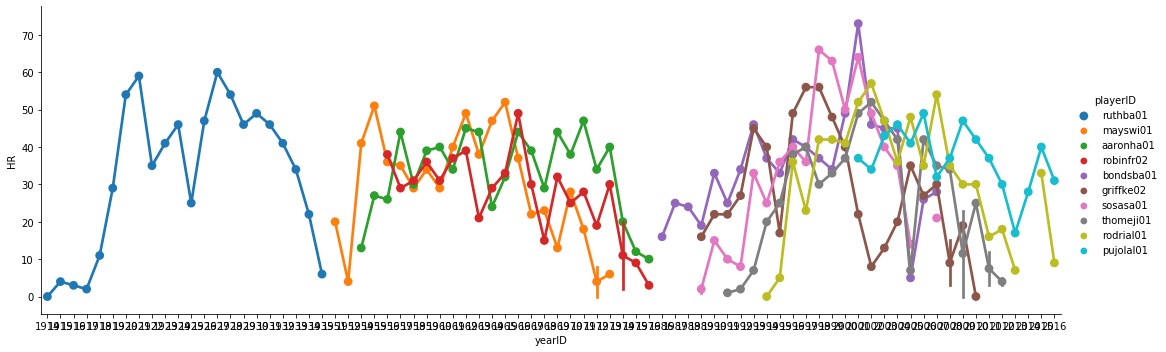

In [54]:
# plot!
sb.catplot(x="yearID",y="HR",hue="playerID",data=topHRHittersRecords
           ,kind="point",aspect=3)

In [56]:
# sammy sosa and mark mcguire
sosaMcGDF = battingDF.query("playerID == 'sosasa01' or playerID == 'mcgwima01'")
sosaMcGDF

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
63825,mcgwima01,1986,1,OAK,AL,18,53,10,10,1,0,3,9.0,0.0,1.0,4,18.0,0.0,1.0,0.0,0.0,0.0
64858,mcgwima01,1987,1,OAK,AL,151,557,97,161,28,4,49,118.0,1.0,1.0,71,131.0,8.0,5.0,0.0,8.0,6.0
65894,mcgwima01,1988,1,OAK,AL,155,550,87,143,22,1,32,99.0,0.0,0.0,76,117.0,4.0,4.0,1.0,4.0,15.0
66955,mcgwima01,1989,1,OAK,AL,143,490,74,113,17,0,33,95.0,1.0,1.0,83,94.0,5.0,3.0,0.0,11.0,23.0
67250,sosasa01,1989,1,TEX,AL,25,84,8,20,3,0,1,3.0,0.0,2.0,0,20.0,0.0,0.0,4.0,0.0,3.0
67251,sosasa01,1989,2,CHA,AL,33,99,19,27,5,0,3,10.0,7.0,3.0,11,27.0,2.0,2.0,1.0,2.0,3.0
68062,mcgwima01,1990,1,OAK,AL,156,523,87,123,16,0,39,108.0,2.0,1.0,110,116.0,9.0,7.0,1.0,9.0,13.0
68368,sosasa01,1990,1,CHA,AL,153,532,72,124,26,10,15,70.0,32.0,16.0,33,150.0,4.0,6.0,2.0,6.0,10.0
69175,mcgwima01,1991,1,OAK,AL,154,483,62,97,22,0,22,75.0,2.0,1.0,93,116.0,3.0,3.0,1.0,5.0,13.0
69458,sosasa01,1991,1,CHA,AL,116,316,39,64,10,1,10,33.0,13.0,6.0,14,98.0,2.0,2.0,5.0,1.0,5.0


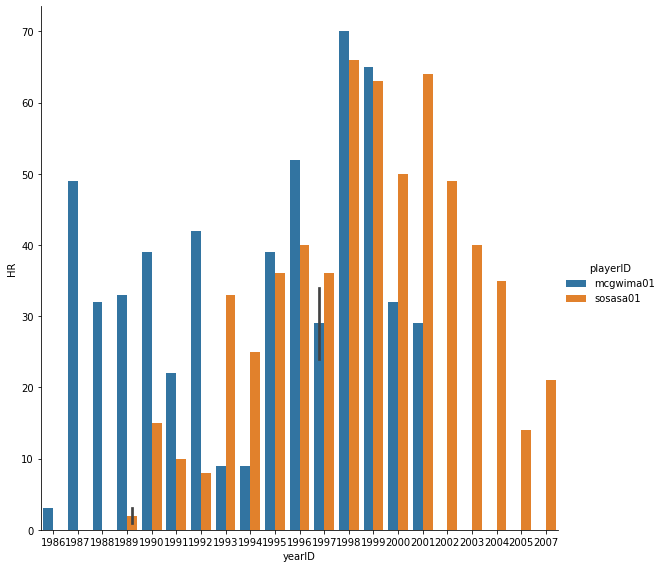

In [61]:
sb.catplot(x="yearID",y="HR",data=sosaMcGDF,hue="playerID",kind="bar",height=8)

In [ ]:
# those lines are confidence intervals. seaborn is misinterpreting the data -- instead of adding
# the two HR totals from those years, seaborn is displaying a confidence interval. one
# of the ways to get rid of these confidence intervals is to use the ci parameter in 
# catplot: ci=None
# we could do a groupby on the dataframe on homeruns and just sum the home runs.

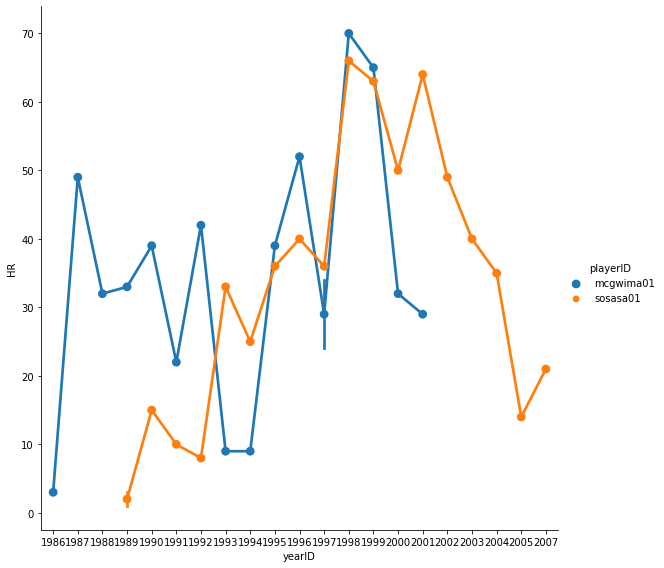

In [62]:
# view the above data as lines
sb.catplot(x="yearID",y="HR",data=sosaMcGDF,hue="playerID",kind="point",height=8)
# lines allow us to see *trends*

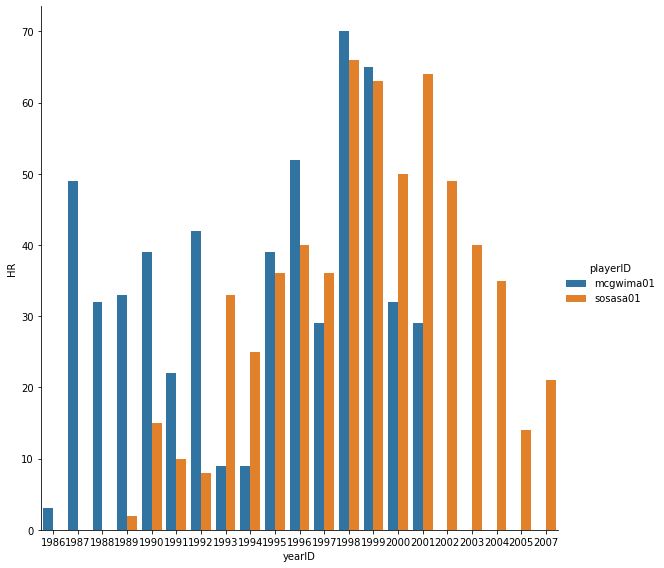

In [64]:
# save plots as pngs?
sosaMcGPlot = sb.catplot(x="yearID",y="HR",data=sosaMcGDF,hue="playerID",
                         kind="bar",height=8,ci=None)
sosaMcGPlot.savefig("sosaMcGBarPlot.png")

In [65]:
# because the number of games played affects the number of home runs a player is likely to hit
# (i.e., more games played typically correlates with more home runs), we can normalize the 
# data to compare "apples to apples", meaning we'll get a better sense of who the best
# HR hitter is, sosa or mcg
# let's create a new column called HRPerG which is Home Runs per Game
sosaMcGDF["HRPerG"] = sosaMcGDF["HR"]/sosaMcGDF["G"]
sosaMcGDF

/Users/jason/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,HRPerG
63825,mcgwima01,1986,1,OAK,AL,18,53,10,10,1,0,3,9.0,0.0,1.0,4,18.0,0.0,1.0,0.0,0.0,0.0,0.166667
64858,mcgwima01,1987,1,OAK,AL,151,557,97,161,28,4,49,118.0,1.0,1.0,71,131.0,8.0,5.0,0.0,8.0,6.0,0.324503
65894,mcgwima01,1988,1,OAK,AL,155,550,87,143,22,1,32,99.0,0.0,0.0,76,117.0,4.0,4.0,1.0,4.0,15.0,0.206452
66955,mcgwima01,1989,1,OAK,AL,143,490,74,113,17,0,33,95.0,1.0,1.0,83,94.0,5.0,3.0,0.0,11.0,23.0,0.230769
67250,sosasa01,1989,1,TEX,AL,25,84,8,20,3,0,1,3.0,0.0,2.0,0,20.0,0.0,0.0,4.0,0.0,3.0,0.040000
67251,sosasa01,1989,2,CHA,AL,33,99,19,27,5,0,3,10.0,7.0,3.0,11,27.0,2.0,2.0,1.0,2.0,3.0,0.090909
68062,mcgwima01,1990,1,OAK,AL,156,523,87,123,16,0,39,108.0,2.0,1.0,110,116.0,9.0,7.0,1.0,9.0,13.0,0.250000
68368,sosasa01,1990,1,CHA,AL,153,532,72,124,26,10,15,70.0,32.0,16.0,33,150.0,4.0,6.0,2.0,6.0,10.0,0.098039
69175,mcgwima01,1991,1,OAK,AL,154,483,62,97,22,0,22,75.0,2.0,1.0,93,116.0,3.0,3.0,1.0,5.0,13.0,0.142857
69458,sosasa01,1991,1,CHA,AL,116,316,39,64,10,1,10,33.0,13.0,6.0,14,98.0,2.0,2.0,5.0,1.0,5.0,0.086207


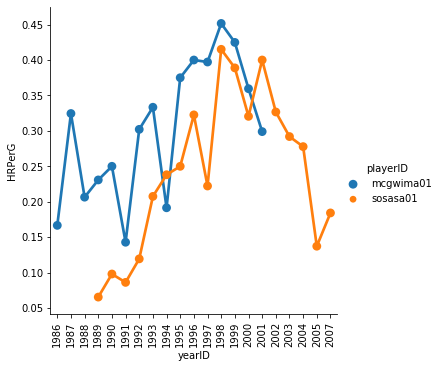

In [66]:
# plot!
sb.catplot(x="yearID",y="HRPerG",data=sosaMcGDF,
           hue="playerID",kind="point",ci=None).set_xticklabels(rotation=90)

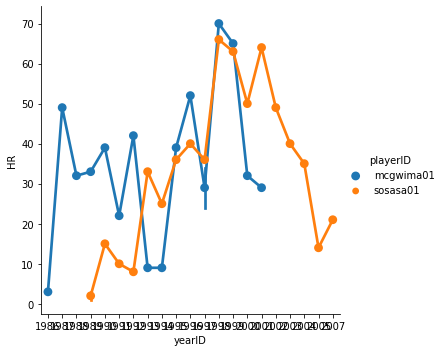

In [67]:
sb.catplot(x="yearID",y="HR",data=sosaMcGDF,hue="playerID",kind="point")